In [1]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv("Car details v3.csv") # Importing the dataset

df.head()

In [3]:
df.shape

(8128, 13)

In [4]:
df.isnull().sum() #Checking for Null values

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df1 = df.dropna() #Dropping Null rows
df1.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
df1.shape

(7906, 13)

### Checking Each Column

In [7]:
df1['seats'].value_counts() # Examining seats column

seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [8]:
# Checking if car with 14 seat is an outlier or not
row_with_14_seats = df1[df1['seats'] == 14]
row_with_14_seats = pd.DataFrame(row_with_14_seats)
row_with_14_seats

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71 kmpl,1948 CC,90 bhp,190Nm@ 2000-3000rpm,14.0


In [9]:
df1['torque'].value_counts() #Inspecting torque column

torque
190Nm@ 2000rpm             530
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: count, Length: 441, dtype: int64

In [10]:
len(df1['torque'].unique())

441

In [11]:
data = df1.copy() # Making a copy if needed in future


In [12]:
# Making 2 new column from torque column
def extract_torque_rpm(value):
    # Replace 'at' with '@' for consistency
    value = value.replace(' at ', ' @ ')
    parts = value.split('@')
    torque = parts[0].strip()
    rpm = parts[1].strip() if len(parts) > 1 else None
    return pd.Series([torque, rpm])

# Apply the function to the 'torque' column
df1[['torque_value', 'rpm']] = df1['torque'].apply(extract_torque_rpm)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\1755363449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['torque_value', 'rpm']] = df1['torque'].apply(extract_torque_rpm)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\1755363449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['torque_value', 'rpm']] = df1['torque'].apply(extract_torque_rpm)


In [13]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190Nm,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250Nm,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,12.7,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,22.4 kgm,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.5,"4,500(kgm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,113.7Nm,4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,24,"1,900-2,750(kgm"
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,190Nm,2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,140Nm,1800-3000rpm


In [14]:
df1['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '

In [15]:
df1['torque_value'] = df1['torque_value'].str.extract('(\d+)').astype(float) # Extracting only numeric part and changing its type to float

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\2953252064.py:1: SyntaxWarning: invalid escape sequence '\d'
  df1['torque_value'] = df1['torque_value'].str.extract('(\d+)').astype(float) # Extracting only numeric part and changing its type to float
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\2953252064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['torque_value'] = df1['torque_value'].str.extract('(\d+)').astype(float) # Extracting only numeric part and changing its type to float


In [16]:
df1.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.0,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.0,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,12.0,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,22.0,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.0,"4,500(kgm"
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,113.0,4000rpm
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,7.0,"4,500(kgm"
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,59.0,2500rpm
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,170.0,1800-2400rpm
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,160.0,2000rpm


In [17]:
# As torque values have 2 different units, changing kgm to RPM
df1.loc[df1['torque_value'] < 50, 'torque_value'] *= 9.80665

In [18]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.00000,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,117.67980,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,215.74630,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,107.87315,"4,500(kgm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,113.00000,4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.35960,"1,900-2,750(kgm"
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,140.00000,1800-3000rpm


In [19]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.00000,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,117.67980,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,215.74630,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,107.87315,"4,500(kgm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,113.00000,4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.35960,"1,900-2,750(kgm"
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,140.00000,1800-3000rpm


In [20]:
df1['torque_value'].value_counts()

torque_value
200.0000    693
190.0000    673
90.0000     449
114.0000    373
113.0000    369
           ... 
313.8128      1
123.0000      1
490.0000      1
228.0000      1
480.0000      1
Name: count, Length: 183, dtype: int64

In [21]:
data_2 = df1.copy()

In [22]:
df1['torque_value'] = df1['torque_value'].round(2)
df1.tail(15)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\3333848319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['torque_value'] = df1['torque_value'].round(2)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
8113,Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV,2010,425000,129000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0,196.13,1400-3400(kgm
8114,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0,62.00,3000rpm
8115,Maruti 800 AC,1997,40000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,59.00,2500rpm
8116,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,90.00,3500rpm
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.00,2000rpm
8118,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,113.00,4000rpm
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,90.00,3500rpm
8120,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,96.00,3000rpm
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,90.00,3500rpm
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,219.00,1500-2750rpm


In [23]:
#Cleaning RPM Column
def clean_and_average_rpm(rpm):
    if pd.isna(rpm):
        return None
    # Remove commas from the string
    rpm = rpm.replace(',', '')
    # Extract all numeric parts
    numeric_parts = re.findall(r'\d+', rpm)
    numeric_parts = list(map(int, numeric_parts))
    if len(numeric_parts) > 1:
        # Check if the values are in a range format (e.g., 1800-3000)
        if '-' in rpm:
            return sum(numeric_parts) / len(numeric_parts)  # Average the range
        else:
            return max(numeric_parts)  # Use the maximum value if not a range
    return numeric_parts[0]

In [24]:
import re
df1['cleaned_rpm_1'] = df1['rpm'].apply(clean_and_average_rpm)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23240\2847104097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_rpm_1'] = df1['rpm'].apply(clean_and_average_rpm)


In [25]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm,cleaned_rpm_1
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.00,2000rpm,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.00,1500-2500rpm,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,117.68,"2,700(kgm",2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,215.75,1750-2750rpm,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,107.87,"4,500(kgm",4500.0


In [26]:
df1['cleaned_rpm_1'].describe()

count     7864.000000
mean      2888.196020
std        991.626772
min       1300.000000
25%       2000.000000
50%       2400.000000
75%       4000.000000
max      21800.000000
Name: cleaned_rpm_1, dtype: float64

In [27]:
df1 = df1.drop(['torque', 'rpm'],axis=1)
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,cleaned_rpm_1
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,117.68,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,215.75,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,107.87,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,113.00,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,235.36,2325.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,190.00,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,140.00,2400.0


In [28]:
data_3 = df1.copy() #Checkpoint

In [29]:
data_3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,cleaned_rpm_1
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,117.68,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,215.75,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,107.87,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,113.00,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,235.36,2325.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,190.00,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,140.00,2400.0


In [30]:
df2 = df1 
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,cleaned_rpm_1
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,117.68,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,215.75,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,107.87,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,113.00,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,235.36,2325.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,190.00,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,140.00,2400.0


In [31]:
df2['max_power'].value_counts() # Inspecting max power column

max_power
74 bhp        377
81.80 bhp     220
88.5 bhp      204
67 bhp        165
46.3 bhp      162
             ... 
57 bhp          1
58.33 bhp       1
68.4 bhp        1
170.63 bhp      1
135.1 bhp       1
Name: count, Length: 320, dtype: int64

In [32]:
df2['max_power'].describe()

count       7906
unique       320
top       74 bhp
freq         377
Name: max_power, dtype: object

In [33]:
df2['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [34]:
# Function to extract numeric value from 'max power' column
def extract_power(value):
    # Use regular expression to find numeric part
    match = re.search(r'\d+(\.\d+)?', value)
    return float(match.group()) if match else None

In [35]:
df2['max_power_value'] = df2['max_power'].apply(extract_power)

In [36]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,cleaned_rpm_1,max_power_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.00,2000.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.00,2000.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,117.68,2700.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,215.75,2250.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,107.87,4500.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,113.00,4000.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,235.36,2325.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,190.00,2000.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,140.00,2400.0,70.00


In [37]:
type(df2['max_power_value'][0])

numpy.float64

In [38]:
df2['max_power_value'].describe()

count    7906.000000
mean       91.587374
std        35.747216
min        32.800000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power_value, dtype: float64

In [39]:
low_power_cars = df2[df2['max_power_value'] < 70]

# Count the number of cars with less than 70 bhp
num_low_power_cars = low_power_cars.shape[0]
num_low_power_cars

2137

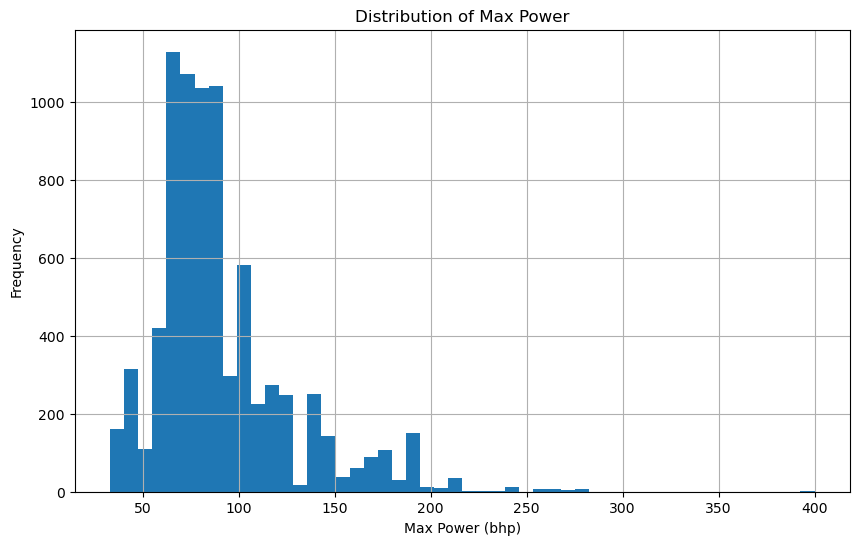

In [40]:
import matplotlib.pyplot as plt

# Plot the distribution of max_power_value
plt.figure(figsize=(10, 6))
df2['max_power_value'].hist(bins=50)
plt.xlabel('Max Power (bhp)')
plt.ylabel('Frequency')
plt.title('Distribution of Max Power')
plt.show()

In [41]:
df3 = df2.drop('max_power', axis=1)
df3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,torque_value,cleaned_rpm_1,max_power_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0,190.00,2000.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0,250.00,2000.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0,117.68,2700.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0,215.75,2250.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0,107.87,4500.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,5.0,113.00,4000.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0,235.36,2325.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,5.0,190.00,2000.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,5.0,140.00,2400.0,70.00


In [42]:
df3['engine'].value_counts() #Inspecting egine column

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      443
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: count, Length: 121, dtype: int64

In [43]:
df3['engine'].unique() #Inspecting egine column

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [44]:
# Function to extract numeric value from 'max power' column
def extract_engine(value):
    # Use regular expression to find numeric part
    match = re.search(r'\d+(\.\d+)?', value)
    return float(match.group()) if match else None

In [45]:
df3['engine size'] = df3['engine'].apply(extract_engine)

In [46]:
df3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,torque_value,cleaned_rpm_1,max_power_value,engine size
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0,190.00,2000.0,74.00,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0,250.00,2000.0,103.52,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0,117.68,2700.0,78.00,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0,215.75,2250.0,90.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0,107.87,4500.0,88.20,1298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,5.0,113.00,4000.0,82.85,1197.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0,235.36,2325.0,110.00,1493.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,5.0,190.00,2000.0,73.90,1248.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,5.0,140.00,2400.0,70.00,1396.0


In [47]:
df3['engine size'].describe()

count    7906.000000
mean     1458.708829
std       503.893057
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine size, dtype: float64

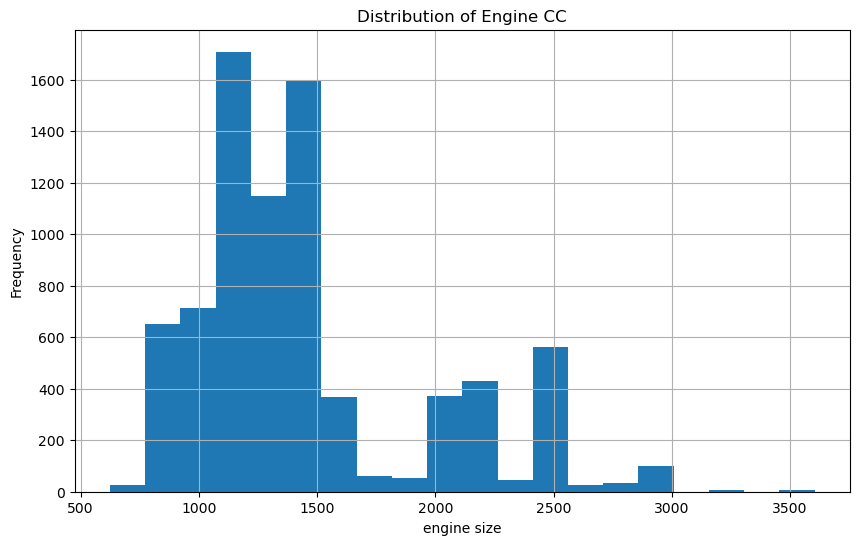

In [48]:
plt.figure(figsize=(10, 6))
df3['engine size'].hist(bins=20)
plt.xlabel('engine size')
plt.ylabel('Frequency')
plt.title('Distribution of Engine CC')
plt.show()

In [49]:
row_with_3604_engine = df3[df3['engine size'] == 3604.0]
row_with_3604_engine = pd.DataFrame(row_with_3604_engine)
row_with_3604_engine

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,torque_value,cleaned_rpm_1,max_power_value,engine size
134,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0
1564,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0
1860,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0
3239,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0
5248,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0
7703,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5 kmpl,3604 CC,5.0,347.0,4300.0,280.0,3604.0


In [50]:
df4 = df3.drop('engine', axis=1)

In [51]:
df4['mileage'].unique() #Inspecting milage column

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [52]:
# Function to extract numeric value from 'max power' column
def extract_milage(value):
    # Use regular expression to find numeric part
    match = re.search(r'\d+(\.\d+)?', value)
    return float(match.group()) if match else None

In [53]:
df4['milage value'] = df4['mileage'].apply(extract_milage)

In [54]:
df4

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,5.0,190.00,2000.0,74.00,1248.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,5.0,250.00,2000.0,103.52,1498.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,5.0,117.68,2700.0,78.00,1497.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,5.0,215.75,2250.0,90.00,1396.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,5.0,107.87,4500.0,88.20,1298.0,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,5.0,113.00,4000.0,82.85,1197.0,18.50
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,5.0,235.36,2325.0,110.00,1493.0,16.80
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,5.0,190.00,2000.0,73.90,1248.0,19.30
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,5.0,140.00,2400.0,70.00,1396.0,23.57


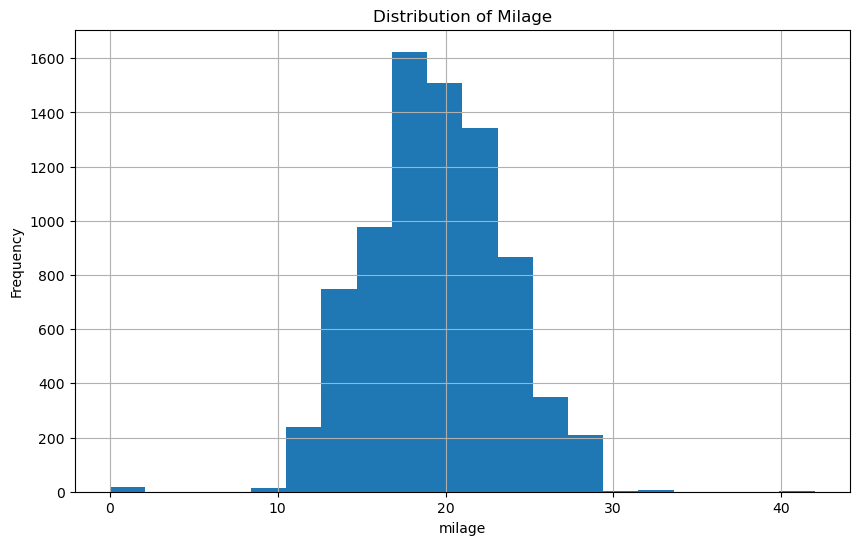

In [55]:
plt.figure(figsize=(10, 6))
df4['milage value'].hist(bins=20)
plt.xlabel('milage')
plt.ylabel('Frequency')
plt.title('Distribution of Milage')
plt.show()

In [56]:
df4['milage value'].describe()

count    7906.000000
mean       19.419861
std         4.036263
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: milage value, dtype: float64

In [57]:
row_with_0_milage = df4[df4['milage value'] == 0.0]
row_with_0_milage = pd.DataFrame(row_with_0_milage)
row_with_0_milage

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value
644,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0 kmpl,5.0,88.26,3000.0,65.00,1172.0,0.0
785,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0 kmpl,5.0,96.00,3000.0,62.00,1086.0,0.0
1649,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0 kmpl,5.0,96.00,3000.0,62.00,1086.0,0.0
1676,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0 kmpl,5.0,510.00,2000.0,165.00,2987.0,0.0
2137,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0 kmpl,5.0,400.00,NaN,115.00,2179.0,0.0
2366,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0 kmpl,5.0,96.00,3000.0,62.10,1086.0,0.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0 kmpl,5.0,96.00,3000.0,62.10,1086.0,0.0
4527,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0 kmpl,5.0,510.00,2000.0,165.00,2987.0,0.0
5276,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0 kmpl,5.0,96.00,3000.0,62.00,1086.0,0.0
5843,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0 kmpl,5.0,175.00,2800.0,103.25,1197.0,0.0


In [58]:
df5 = df4[df4['milage value'] != 0]


In [59]:
df5['milage value'].describe()

count    7889.000000
mean       19.461709
std         3.938527
min         9.000000
25%        16.780000
50%        19.330000
75%        22.320000
max        42.000000
Name: milage value, dtype: float64

In [60]:
df5 = df5.drop('mileage', axis=1)
df5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,74.00,1248.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,250.00,2000.0,103.52,1498.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,117.68,2700.0,78.00,1497.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,215.75,2250.0,90.00,1396.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,107.87,4500.0,88.20,1298.0,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,113.00,4000.0,82.85,1197.0,18.50
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,235.36,2325.0,110.00,1493.0,16.80
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,73.90,1248.0,19.30
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,140.00,2400.0,70.00,1396.0,23.57


In [61]:
#Checkpoint
data_4 = df5.copy()

In [62]:
data_4

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,74.00,1248.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,250.00,2000.0,103.52,1498.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,117.68,2700.0,78.00,1497.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,215.75,2250.0,90.00,1396.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,107.87,4500.0,88.20,1298.0,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,113.00,4000.0,82.85,1197.0,18.50
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,235.36,2325.0,110.00,1493.0,16.80
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,73.90,1248.0,19.30
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,140.00,2400.0,70.00,1396.0,23.57


In [63]:
data_2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.00000,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,117.67980,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,215.74630,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,107.87315,"4,500(kgm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,113.00000,4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.35960,"1,900-2,750(kgm"
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,190.00000,2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,140.00000,1800-3000rpm


In [64]:
df5['owner'].value_counts() 

owner
First Owner             5205
Second Owner            2012
Third Owner              508
Fourth & Above Owner     159
Test Drive Car             5
Name: count, dtype: int64

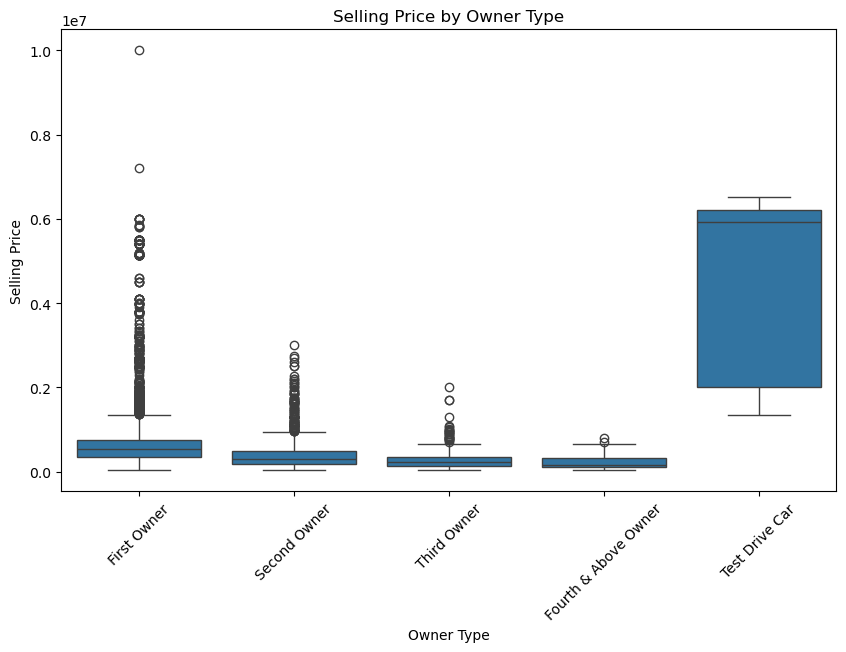

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Owner Type')
plt.xticks(rotation=45)
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'owner' column
df5['owner_encoded'] = label_encoder.fit_transform(df5['owner'])

In [67]:
df5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,74.00,1248.0,23.40,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,250.00,2000.0,103.52,1498.0,21.14,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,117.68,2700.0,78.00,1497.0,17.70,4
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,215.75,2250.0,90.00,1396.0,23.00,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,107.87,4500.0,88.20,1298.0,16.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,113.00,4000.0,82.85,1197.0,18.50,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,235.36,2325.0,110.00,1493.0,16.80,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,190.00,2000.0,73.90,1248.0,19.30,0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,140.00,2400.0,70.00,1396.0,23.57,0


In [68]:
df6 = df5.drop('owner', axis=1)
df6

,name,year,selling_price,km_driven,fuel,seller_type,transmission,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,5.0,190.00,2000.0,74.00,1248.0,23.40,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,5.0,250.00,2000.0,103.52,1498.0,21.14,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,5.0,117.68,2700.0,78.00,1497.0,17.70,4
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,5.0,215.75,2250.0,90.00,1396.0,23.00,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,5.0,107.87,4500.0,88.20,1298.0,16.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,5.0,113.00,4000.0,82.85,1197.0,18.50,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,5.0,235.36,2325.0,110.00,1493.0,16.80,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,5.0,190.00,2000.0,73.90,1248.0,19.30,0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,5.0,140.00,2400.0,70.00,1396.0,23.57,0


In [69]:
df6['transmission'].value_counts()

transmission
Manual       6854
Automatic    1035
Name: count, dtype: int64

In [70]:
df6 = pd.get_dummies(df6, columns=['transmission'], prefix='transmission')

In [71]:
df6.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,5.0,113.00,4000.0,81.86,1197.0,20.14,0,False,True
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,5.0,68.65,4500.0,57.50,1061.0,17.30,0,False,True
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,4.0,59.00,2500.0,37.00,796.0,16.10,2,False,True
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,5.0,170.00,2100.0,67.10,1364.0,23.59,0,False,True
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,5.0,160.00,2000.0,68.10,1399.0,20.00,0,False,True


In [72]:
df6['seller_type'].value_counts()

seller_type
Individual          6550
Dealer              1103
Trustmark Dealer     236
Name: count, dtype: int64

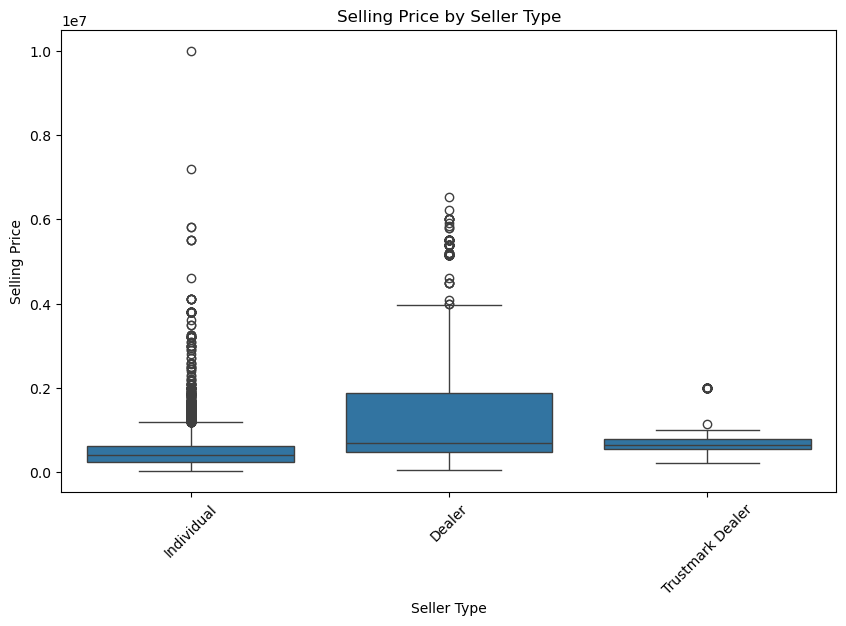

In [73]:
import seaborn as sns

# Plot the relationship between seller type and selling price
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df6)
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Seller Type')
plt.xticks(rotation=45)
plt.show()


In [74]:
df6 = pd.get_dummies(df6, columns=['seller_type'], prefix='Seller')
df6

,name,year,selling_price,km_driven,fuel,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,5.0,190.00,2000.0,73.90,1248.0,19.30,0,False,True,False,True,False
8126,Tata Indigo CR4,2013,290000,25000,Diesel,5.0,140.00,2400.0,70.00,1396.0,23.57,0,False,True,False,True,False


In [75]:
df6['fuel'].value_counts()

fuel
Diesel    4293
Petrol    3509
CNG         52
LPG         35
Name: count, dtype: int64

In [76]:
df6 = pd.get_dummies(df6, columns=['fuel'], prefix='Fuel')
df6

,name,year,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True
8124,Hyundai Verna CRDi SX,2007,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,5.0,190.00,2000.0,73.90,1248.0,19.30,0,False,True,False,True,False,False,True,False,False
8126,Tata Indigo CR4,2013,290000,25000,5.0,140.00,2400.0,70.00,1396.0,23.57,0,False,True,False,True,False,False,True,False,False


In [77]:
data_5 = df6.copy()

In [78]:
df6['car_age'] = 2024 - df6['year']

In [79]:
df6

,name,year,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,...,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,...,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,...,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,2006,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,...,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,2010,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,...,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,2007,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,...,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,...,False,True,False,True,False,False,False,False,True,11
8124,Hyundai Verna CRDi SX,2007,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,...,False,True,False,True,False,False,True,False,False,17
8125,Maruti Swift Dzire ZDi,2009,382000,120000,5.0,190.00,2000.0,73.90,1248.0,19.30,...,False,True,False,True,False,False,True,False,False,15
8126,Tata Indigo CR4,2013,290000,25000,5.0,140.00,2400.0,70.00,1396.0,23.57,...,False,True,False,True,False,False,True,False,False,11


In [80]:
df7 = df6.drop('year',axis=1)

In [81]:
df7

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True,11
8124,Hyundai Verna CRDi SX,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False,17
8125,Maruti Swift Dzire ZDi,382000,120000,5.0,190.00,2000.0,73.90,1248.0,19.30,0,False,True,False,True,False,False,True,False,False,15
8126,Tata Indigo CR4,290000,25000,5.0,140.00,2400.0,70.00,1396.0,23.57,0,False,True,False,True,False,False,True,False,False,11


In [82]:
df7['name'].value_counts()

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 1973, dtype: int64

In [83]:
df7['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [84]:
len(df7['name'].unique())

1973

In [85]:
num_duplicates = df7.duplicated().sum()
num_duplicates

1187

In [86]:
df8 = df7.drop_duplicates()

In [87]:
df8.shape

(6702, 20)

In [88]:
df8

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,5.0,90.00,3500.0,67.10,998.0,18.90,2,False,True,False,True,False,False,False,False,True,11
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,5.0,219.00,2125.0,88.73,1396.0,22.54,2,False,True,False,True,False,False,True,False,False,10
8123,Hyundai i20 Magna,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True,11
8124,Hyundai Verna CRDi SX,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False,17


In [89]:
df8

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,5.0,90.00,3500.0,67.10,998.0,18.90,2,False,True,False,True,False,False,False,False,True,11
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,5.0,219.00,2125.0,88.73,1396.0,22.54,2,False,True,False,True,False,False,True,False,False,10
8123,Hyundai i20 Magna,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True,11
8124,Hyundai Verna CRDi SX,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False,17


In [90]:
df8.isnull().sum()

name                        0
selling_price               0
km_driven                   0
seats                       0
torque_value                0
cleaned_rpm_1              11
max_power_value             0
engine size                 0
milage value                0
owner_encoded               0
transmission_Automatic      0
transmission_Manual         0
Seller_Dealer               0
Seller_Individual           0
Seller_Trustmark Dealer     0
Fuel_CNG                    0
Fuel_Diesel                 0
Fuel_LPG                    0
Fuel_Petrol                 0
car_age                     0
dtype: int64

In [91]:
df8[df8['cleaned_rpm_1'].isnull()]

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
145,Volvo XC40 D4 R-Design,3400000,22000,5.0,400.0,NaN,190.0,1969.0,18.0,0,True,False,True,False,False,False,True,False,False,6
374,Volvo XC40 D4 Inscription BSIV,3800000,20000,5.0,400.0,NaN,190.0,1969.0,18.0,0,True,False,False,True,False,False,True,False,False,5
4373,Skoda Octavia Classic 1.9 TDI MT,280000,150000,5.0,210.0,NaN,66.0,1896.0,18.7,4,False,True,False,True,False,False,True,False,False,18
5572,Skoda Octavia Classic 1.9 TDI MT,300000,155000,5.0,210.0,NaN,66.0,1896.0,18.7,0,False,True,False,True,False,False,True,False,False,17
5785,Skoda Octavia Ambiente 1.9 TDI MT,110000,120000,5.0,210.0,NaN,66.0,1896.0,18.7,2,False,True,False,True,False,False,True,False,False,17
6418,Skoda Octavia Ambiente 1.9 TDI MT,100000,250000,5.0,210.0,NaN,66.0,1896.0,18.7,2,False,True,False,True,False,False,True,False,False,21
7154,Skoda Octavia Rider 1.9 AT TDI,210000,120000,5.0,210.0,NaN,66.0,1896.0,18.7,2,False,True,False,True,False,False,True,False,False,16
7296,Skoda Octavia Ambiente 1.9 TDI,355000,116000,5.0,210.0,NaN,66.0,1896.0,18.7,0,False,True,False,True,False,False,True,False,False,14
7516,Volvo XC60 Inscription D5 BSIV,5500000,50000,5.0,480.0,NaN,235.0,1969.0,11.2,0,True,False,False,True,False,False,True,False,False,6
7532,Skoda Octavia Ambiente 1.9 TDI MT,195000,175000,5.0,210.0,NaN,66.0,1896.0,18.7,2,False,True,False,True,False,False,True,False,False,17


In [92]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [93]:
df.head(150)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
146,Audi Q7 35 TDI Quattro Premium,2015,2650000,53000,Diesel,Dealer,Automatic,First Owner,12.07 kmpl,2967 CC,241.4 bhp,550Nm@ 1750-2750rpm,7.0
147,Maruti Ciaz ZDi,2015,535000,40000,Diesel,Dealer,Manual,First Owner,26.21 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0


In [94]:
df8 = df8.dropna()

In [95]:
df8.isnull().sum()

name                       0
selling_price              0
km_driven                  0
seats                      0
torque_value               0
cleaned_rpm_1              0
max_power_value            0
engine size                0
milage value               0
owner_encoded              0
transmission_Automatic     0
transmission_Manual        0
Seller_Dealer              0
Seller_Individual          0
Seller_Trustmark Dealer    0
Fuel_CNG                   0
Fuel_Diesel                0
Fuel_LPG                   0
Fuel_Petrol                0
car_age                    0
dtype: int64

## Train Test Split

In [96]:
df8.shape

(6691, 20)

In [97]:
X = df8.drop(['name', 'selling_price'], axis=1)
Y = df8['selling_price']

In [98]:
X.shape

(6691, 18)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape, y_train.shape)

(6021, 18)
(670, 18)
(670,) (6021,)


### Linear Regression Model

In [101]:
linear_reg = LinearRegression()

In [102]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [103]:
#Prediction on tarining data
training_pred = linear_reg.predict(x_train)

In [104]:
# R squared error
error_score = metrics.r2_score(y_train, training_pred)
error_score

0.6370998679757434

## Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor

DS_tree_reg = DecisionTreeRegressor()
DS_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [106]:
from sklearn.metrics import r2_score
y_train_pred = DS_tree_reg.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
print(f'R² score on training set: {r2_train}')
## Overfitting

R² score on training set: 0.9990609541255101


### Dealing with overfitting

In [107]:
model_Decision_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=10)
model_Decision_tree.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20)

In [108]:
y_val_pred = model_Decision_tree.predict(x_train)
r2_val = r2_score(y_train, y_val_pred)
print(f'R² score on validation set: {r2_val}')

R² score on validation set: 0.9000653112848002


In [109]:
df8.isnull().sum()

name                       0
selling_price              0
km_driven                  0
seats                      0
torque_value               0
cleaned_rpm_1              0
max_power_value            0
engine size                0
milage value               0
owner_encoded              0
transmission_Automatic     0
transmission_Manual        0
Seller_Dealer              0
Seller_Individual          0
Seller_Trustmark Dealer    0
Fuel_CNG                   0
Fuel_Diesel                0
Fuel_LPG                   0
Fuel_Petrol                0
car_age                    0
dtype: int64

## Fitting Neural Network

In [110]:
X

,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,50000,5.0,90.00,3500.0,67.10,998.0,18.90,2,False,True,False,True,False,False,False,False,True,11
8122,80000,5.0,219.00,2125.0,88.73,1396.0,22.54,2,False,True,False,True,False,False,True,False,False,10
8123,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True,11
8124,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False,17


In [111]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6691, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [113]:
x_train.shape

(5352, 18)

In [114]:
y_train.shape

(5352,)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm


In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [119]:
x_train

,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
964,151000,8.0,196.13,2400.0,102.00,2494.0,12.80,0,False,True,False,True,False,False,True,False,False,12
7759,49523,5.0,146.00,4800.0,118.00,1497.0,17.00,0,False,True,True,False,False,False,False,False,True,7
2077,60000,5.0,127.49,2500.0,70.00,1405.0,17.00,4,False,True,False,True,False,False,True,False,False,16
6423,20000,5.0,90.00,3500.0,67.05,998.0,23.95,0,False,True,False,True,False,False,False,False,True,7
2816,40000,5.0,190.00,2000.0,74.00,1248.0,26.59,0,False,True,False,True,False,False,True,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,7600,5.0,90.00,3500.0,67.00,998.0,21.63,0,False,True,False,True,False,False,False,False,True,5
6243,35000,5.0,190.00,2000.0,74.00,1248.0,27.39,0,False,True,False,True,False,False,True,False,False,7
6291,76000,7.0,200.00,1750.0,88.50,1248.0,25.47,0,False,True,True,False,False,False,True,False,False,7
6467,35000,5.0,114.00,4000.0,82.00,1197.0,18.90,0,False,True,False,True,False,False,False,False,True,8


In [120]:
x_train = x_train.values

In [121]:
x_train

array([[151000, 8.0, 196.13, ..., False, False, 12],
       [49523, 5.0, 146.0, ..., False, True, 7],
       [60000, 5.0, 127.49, ..., False, False, 16],
       ...,
       [76000, 7.0, 200.0, ..., False, False, 7],
       [35000, 5.0, 114.0, ..., False, True, 8],
       [108000, 5.0, 190.0, ..., False, False, 12]], dtype=object)

In [122]:
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [123]:
x_train = scaler.fit_transform(x_train)

In [124]:
x_test = scaler.transform(x_test)

In [125]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_absolute_error', optimizer='adam')

In [126]:
model.fit(x=x_train, y=y_train, epochs=25, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 520631.4688 - val_loss: 517764.8750
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 524111.5000 - val_loss: 517759.3438
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 519615.7812 - val_loss: 517739.8438
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 522505.1250 - val_loss: 517682.4375
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 522710.9688 - val_loss: 517542.3438
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 531065.3750 - val_loss: 517250.0938
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 525621.0000 - val_loss: 516707.8125
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 517335.7500 - val_loss: 515794.3438
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 524963.1250 - val_loss: 514362.8438
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 542509.3125 - val_loss: 512237.5938
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

In [127]:
losses = pd.DataFrame(model.history.history)

In [128]:
losses

,loss,val_loss
0,525478.68750,517764.87500
1,525475.62500,517759.34375
2,525464.75000,517739.84375
3,525430.12500,517682.43750
4,525338.50000,517542.34375
5,525132.93750,517250.09375
6,524730.43750,516707.81250
7,524024.06250,515794.34375
8,522882.78125,514362.84375
9,521141.15625,512237.59375


<Axes: >

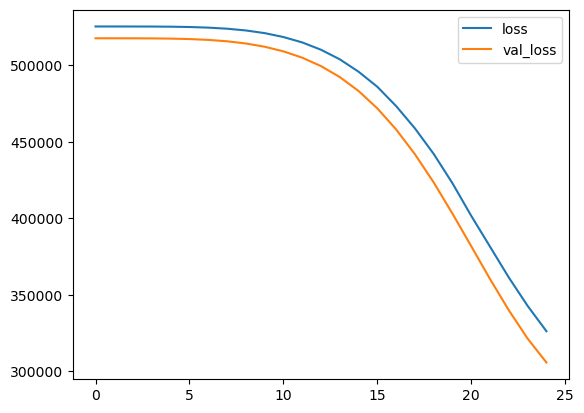

In [129]:
losses.plot()

In [131]:
from sklearn.metrics import mean_absolute_error

# Get model predictions
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 305772.2584834765


In [132]:
model.fit(x=x_train, y=y_train, epochs=75, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 304684.0625 - val_loss: 293687.9688
Epoch 2/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299374.0312 - val_loss: 284963.6875
Epoch 3/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300301.1562 - val_loss: 278868.6250
Epoch 4/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300991.9688 - val_loss: 274471.8125
Epoch 5/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 292102.8125 - val_loss: 271205.9062
Epoch 6/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 285813.1562 - val_loss: 268797.1250
Epoch 7/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283338.8438 - val_loss: 266912.7500
Epoch 8/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 288572.0625 - val_loss: 265273.8125
Epoch 9/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283156.9375 - val_loss: 263873.7188
Epoch 10/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283247.2812 - val_loss: 262589.4688
Epoch 11/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

In [133]:
from sklearn.metrics import mean_absolute_error

# Get model predictions
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error: 199794.86246003315


In [134]:
x_train

array([[0.06397027, 0.66666667, 0.20926417, ..., 0.        , 0.        ,
        0.30769231],
       [0.02097984, 0.16666667, 0.14240367, ..., 0.        , 1.        ,
        0.11538462],
       [0.02541839, 0.16666667, 0.1177161 , ..., 0.        , 0.        ,
        0.46153846],
       ...,
       [0.03219675, 0.5       , 0.21442576, ..., 0.        , 0.        ,
        0.11538462],
       [0.01482722, 0.16666667, 0.09972392, ..., 0.        , 1.        ,
        0.15384615],
       [0.04575345, 0.16666667, 0.20108833, ..., 0.        , 0.        ,
        0.30769231]])

In [135]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam')


In [137]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 528863.0000 - val_loss: 529355.1875
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518761.2188 - val_loss: 471975.7188
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425696.2188 - val_loss: 309548.6250
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 275956.7812 - val_loss: 278400.6250
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266154.2500 - val_loss: 268938.1250
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262944.3125 - val_loss: 260473.8750
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259941.2188 - val_loss: 252224.0000
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247266.7344 - val_loss: 243819.9219
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242422.0938 - val_loss: 235574.5312
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244116.1406 - val_loss: 227417.2344
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━

In [138]:
from sklearn.metrics import mean_absolute_error

# Get model predictions
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 122979.24330628035


In [139]:
df8

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,5.0,90.00,3500.0,67.10,998.0,18.90,2,False,True,False,True,False,False,False,False,True,11
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,5.0,219.00,2125.0,88.73,1396.0,22.54,2,False,True,False,True,False,False,True,False,False,10
8123,Hyundai i20 Magna,320000,110000,5.0,113.00,4000.0,82.85,1197.0,18.50,0,False,True,False,True,False,False,False,False,True,11
8124,Hyundai Verna CRDi SX,135000,119000,5.0,235.36,2325.0,110.00,1493.0,16.80,1,False,True,False,True,False,False,True,False,False,17


### Using PCA


In [140]:
df8.head()

,name,selling_price,km_driven,seats,torque_value,cleaned_rpm_1,max_power_value,engine size,milage value,owner_encoded,transmission_Automatic,transmission_Manual,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,car_age
0,Maruti Swift Dzire VDI,450000,145500,5.0,190.00,2000.0,74.00,1248.0,23.40,0,False,True,False,True,False,False,True,False,False,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,5.0,250.00,2000.0,103.52,1498.0,21.14,2,False,True,False,True,False,False,True,False,False,10
2,Honda City 2017-2020 EXi,158000,140000,5.0,117.68,2700.0,78.00,1497.0,17.70,4,False,True,False,True,False,False,False,False,True,18
3,Hyundai i20 Sportz Diesel,225000,127000,5.0,215.75,2250.0,90.00,1396.0,23.00,0,False,True,False,True,False,False,True,False,False,14
4,Maruti Swift VXI BSIII,130000,120000,5.0,107.87,4500.0,88.20,1298.0,16.10,0,False,True,False,True,False,False,False,False,True,17


In [142]:
X = df8.drop(['selling_price', 'name'], axis=1).values
y = df8['selling_price']

In [143]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assume X_train and X_test are your feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA, preserving 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [146]:
X_train_pca

array([[ 2.96068677,  1.25789405, -1.53727565, ...,  1.37646859,
         0.47462657,  0.07262511],
       [-0.94766676, -3.47474659,  0.53914336, ..., -0.36413943,
        -1.11133574, -0.49692792],
       [ 0.17926371,  1.79456013, -0.96033408, ..., -1.39390716,
         1.05329411,  0.09597219],
       ...,
       [ 1.6672652 , -1.27335438,  3.29452303, ...,  0.74007664,
         0.91048679, -0.77109907],
       [-2.04748866, -0.60976561, -0.23417851, ..., -0.06499547,
        -0.41383689,  0.04052468],
       [ 0.61180333,  1.24286695,  0.76330794, ...,  0.67578499,
        -0.29160044,  0.86413744]])

In [149]:
print(X_train_pca.shape)
print(y_train.shape)


(5352, 11)
(5352,)


In [151]:
X_train_scaled

array([[ 1.2594869 ,  2.63408841,  0.2931202 , ..., -0.06986925,
        -0.89521711,  0.41135288],
       [-0.39347267, -0.44556815, -0.29292269, ..., -0.06986925,
         1.11704747, -0.8606373 ],
       [-0.22281275, -0.44556815, -0.50931316, ..., -0.06986925,
        -0.89521711,  1.42894502],
       ...,
       [ 0.03781137,  1.60753623,  0.33836229, ..., -0.06986925,
        -0.89521711, -0.8606373 ],
       [-0.63003792, -0.44556815, -0.6670175 , ..., -0.06986925,
         1.11704747, -0.60623927],
       [ 0.55905959, -0.44556815,  0.22145766, ..., -0.06986925,
        -0.89521711,  0.41135288]])